## CNN Handwritten Digit Classification

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 135s 176ms/step - accuracy: 0.8785 - loss: 0.3831 - val_accuracy: 0.9834 - val_loss: 0.0551
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 174ms/step - accuracy: 0.9848 - loss: 0.0497 - val_accuracy: 0.9884 - val_loss: 0.0394
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 129s 173ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 172ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9887 - val_loss: 0.0356
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 171ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9883 - val_loss: 0.0389
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 173ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9906 - val_loss: 0.0303
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 172ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9898 - val_loss: 0.0383
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 128s 171ms/step - accuracy: 0.9973 -

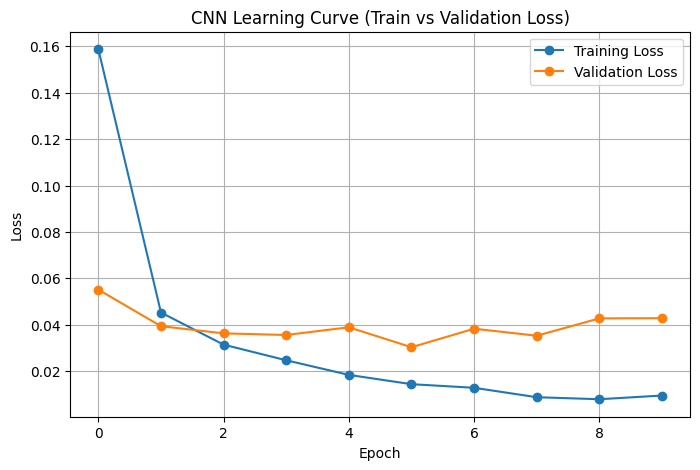

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Test Accuracy: 0.9923
Test F1 Score: 0.9922993405639001


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, f1_score

# Load MNIST Dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize pixels to [0,1]
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to (samples, height, width, channels)
X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_full_cat = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

# Split into Train (80%) + Validation (20%)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_cat, test_size=0.20, random_state=42
)

# Build CNN Model with 3 convolutional layers
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model for 10 epochs
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

# Plot learning curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Learning Curve (Train vs Validation Loss)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
y_pred_proba = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_proba, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_labels)
test_f1 = f1_score(y_test, y_pred_labels, average="weighted")

print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)

The CNN does not show signs of significant overfitting. The training loss steadily decreases across epochs, reaching a very low value, while the validation loss follows a similar downward trend early in training and remains close to the training loss throughout. Although the validation loss fluctuates slightly, it does not show a sharp or sustained upward trend that would indicate overfitting. The model’s test accuracy of 0.9923 and test F1-score of 0.9923 demonstrate excellent generalization. 